In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta


In [3]:
#tripdata_file = "RideShare_Data_201801.csv"

#src_df = pd.read_csv(tripdata_file)

#src_df

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear
5,2018-01-01 04:44:39,2018-01-01 05:01:29,7.0,244.0,0.0,"Astoria, Queens","Washington Heights South, Manhattan",11366,10024,16.833333,8,55,4,800,Clear,sky is clear
6,2018-01-01 02:39:44,2018-01-01 02:48:16,144.0,249.0,0.0,"Little Italy/NoLiTa, Manhattan","West Village, Manhattan",10013,10024,8.533333,9,46,5,800,Clear,sky is clear
7,2018-01-01 03:46:04,2018-01-01 03:51:51,246.0,68.0,0.0,"West Chelsea/Hudson Yards, Manhattan","East Chelsea, Manhattan",10001,10024,5.783333,9,51,5,800,Clear,sky is clear
8,2018-01-01 05:34:02,2018-01-01 05:39:42,130.0,215.0,0.0,"Jamaica, Queens","South Jamaica, Queens",11366,11366,5.666667,8,55,4,800,Clear,sky is clear
9,2018-01-01 13:59:46,2018-01-01 14:09:11,49.0,65.0,0.0,"Clinton Hill, Brooklyn","Downtown Brooklyn/MetroTech, Brooklyn",11216,11201,9.416667,8,60,2,800,Clear,sky is clear


In [4]:
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
src_df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])

In [5]:
src_df["week_day"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.dayofweek

src_df.head()
src_df["week_day"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [6]:
def fdayofweek(x):
    return {
        0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thrusday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday',
     }.get(x, "NA")



src_df["week_day_name"]= src_df["week_day"].apply(fdayofweek)
src_df["week_day_name"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [7]:
src_df["date"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.day
src_df["date"]

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
          ..
261524    31
261525    31
261526    31
261527    31
261528    31
261529    31
261530    31
261531    31
261532    31
261533    31
261534    31
261535    31
261536    31
261537    31
261538    31
261539    31
261540    31
261541    31
261542    31
261543    31
261544    31
261545    31
261546    31
261547    31
261548    31
261549    31
261550    31
261551    31
261552    31
261553    31
Name: date, Length: 3009575, dtype: int64

In [8]:
src_df["hours"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.hour
src_df["hours"]

# Create bins in which to place values based upon TED Talk views
bins = [-1, 11, 12, 16, 17, 23]
       

# Create labels for these bins
group_labels = ["Morning", "Noon", "afternoon", "evening", "night"]

In [9]:
src_df["hours_group"]= pd.cut(src_df["hours"], bins, labels=group_labels)


In [10]:
src_df['weather_main'] = src_df['weather_main'].astype(str)
weather_grp_df = src_df.groupby(src_df['weather_main'])
weather_grp_df.head()


,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,...,humidity,wind_speed,weather_id,weather_main,weather_description,week_day,week_day_name,date,hours,hours_group
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,...,34,3,800,Clear,sky is clear,0,Monday,1,22,night
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,...,60,2,800,Clear,sky is clear,0,Monday,1,12,Noon
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,...,43,4,800,Clear,sky is clear,0,Monday,1,0,Morning
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,...,46,5,800,Clear,sky is clear,0,Monday,1,2,Morning
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,...,60,2,800,Clear,sky is clear,0,Monday,1,14,afternoon
8121,2018-01-02 12:15:06,2018-01-02 12:38:52,238.0,232.0,0.0,"Upper West Side North, Manhattan","Two Bridges/Seward Park, Manhattan",10024,10024,23.766667,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,12,Noon
8138,2018-01-02 11:54:39,2018-01-02 12:00:50,155.0,91.0,1.0,"Marine Park/Mill Basin, Brooklyn","Flatlands, Brooklyn",11234,11216,6.183333,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,11,Morning
8143,2018-01-02 12:06:37,2018-01-02 12:10:13,35.0,35.0,0.0,"Brownsville, Brooklyn","Brownsville, Brooklyn",11216,11216,3.600000,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,12,Noon
8145,2018-01-02 12:02:29,2018-01-02 12:21:53,170.0,161.0,0.0,"Murray Hill, Manhattan","Midtown Center, Manhattan",10024,10036,19.400000,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,12,Noon
8174,2018-01-02 11:45:38,2018-01-02 12:08:25,61.0,181.0,1.0,"Crown Heights North, Brooklyn","Park Slope, Brooklyn",11216,11216,22.783333,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,11,Morning


In [11]:
day_hrs = src_df.groupby(['hours_group','weather_main'])
day_hrs.count()
#(df.groupby(['cluster', 'org'], as_index=False).mean()
 #           .groupby('cluster')['time'].mean())
#weather_grp_df['hours_group'] .count()   

Pickup_DateTime  DropOff_datetime  PUlocationID  \
hours_group weather_main                                                    
Morning     Clear                364449.0          364449.0      364449.0   
            Clouds               247794.0          247794.0      247794.0   
            Drizzle               13618.0           13618.0       13618.0   
            Fog                   28901.0           28901.0       28901.0   
            Haze                   8105.0            8105.0        8105.0   
            Mist                 199105.0          199105.0      199105.0   
            Rain                 210397.0          210397.0      210397.0   
            Smoke                     NaN               NaN           NaN   
            Snow                  25250.0           25250.0       25250.0   
            Thunderstorm           5299.0            5299.0        5299.0   
Noon        Clear                 42045.0           42045.0       42045.0   
            Clouds                25778.0           25778.0       25778.0   
            Drizzle                1025.0            1025.0        1025.0   
            Fog                    2923.0            2923.0        2923.0   
            Haze                   5427.0            5427.0        5427.0   
            Mist                  21996.0           21996.0       21996.0   
            Rain                  24503.0           24503.0       24503.0   
            Smoke                     NaN               NaN           NaN   
            Snow                   2399.0            2399.0        2399.0   
            Thunderstorm            196.0             196.0         196.0   
afternoon   Clear                191217.0          191217.0      191217.0   
            Clouds               174552.0          174552.0      174552.0   
            Drizzle                5544.0            5544.0        5544.0   
            Fog                    1982.0            1982.0        1982.0   
            Haze                  28712.0           28712.0       28712.0   
            Mist                  44264.0           44264.0       44264.0   
            Rain                 102381.0          102381.0      102381.0   
            Smoke                   900.0             900.0         900.0   
            Snow                  18325.0           18325.0       18325.0   
            Thunderstorm           1394.0            1394.0        1394.0   
evening     Clear                 53098.0           53098.0       53098.0   
            Clouds                69476.0           69476.0       69476.0   
            Drizzle                1186.0            1186.0        1186.0   
            Fog                     227.0             227.0         227.0   
            Haze                   5822.0            5822.0        5822.0   
            Mist                   8223.0            8223.0        8223.0   
            Rain                  30642.0           30642.0       30642.0   
            Smoke                   215.0             215.0         215.0   
            Snow                   4645.0            4645.0        4645.0   
            Thunderstorm           2034.0            2034.0        2034.0   
night       Clear                325205.0          325205.0      325205.0   
            Clouds               406183.0          406183.0      406183.0   
            Drizzle                8482.0            8482.0        8482.0   
            Fog                    1597.0            1597.0        1597.0   
            Haze                  19281.0           19281.0       19281.0   
            Mist                  50418.0           50418.0       50418.0   
            Rain                 185332.0          185332.0      185332.0   
            Smoke                     NaN               NaN           NaN   
            Snow                  23265.0           23265.0       23265.0   
            Thunderstorm          15763.0           15763.0       15763.0   

                     

<IPython.core.display.Javascript object>


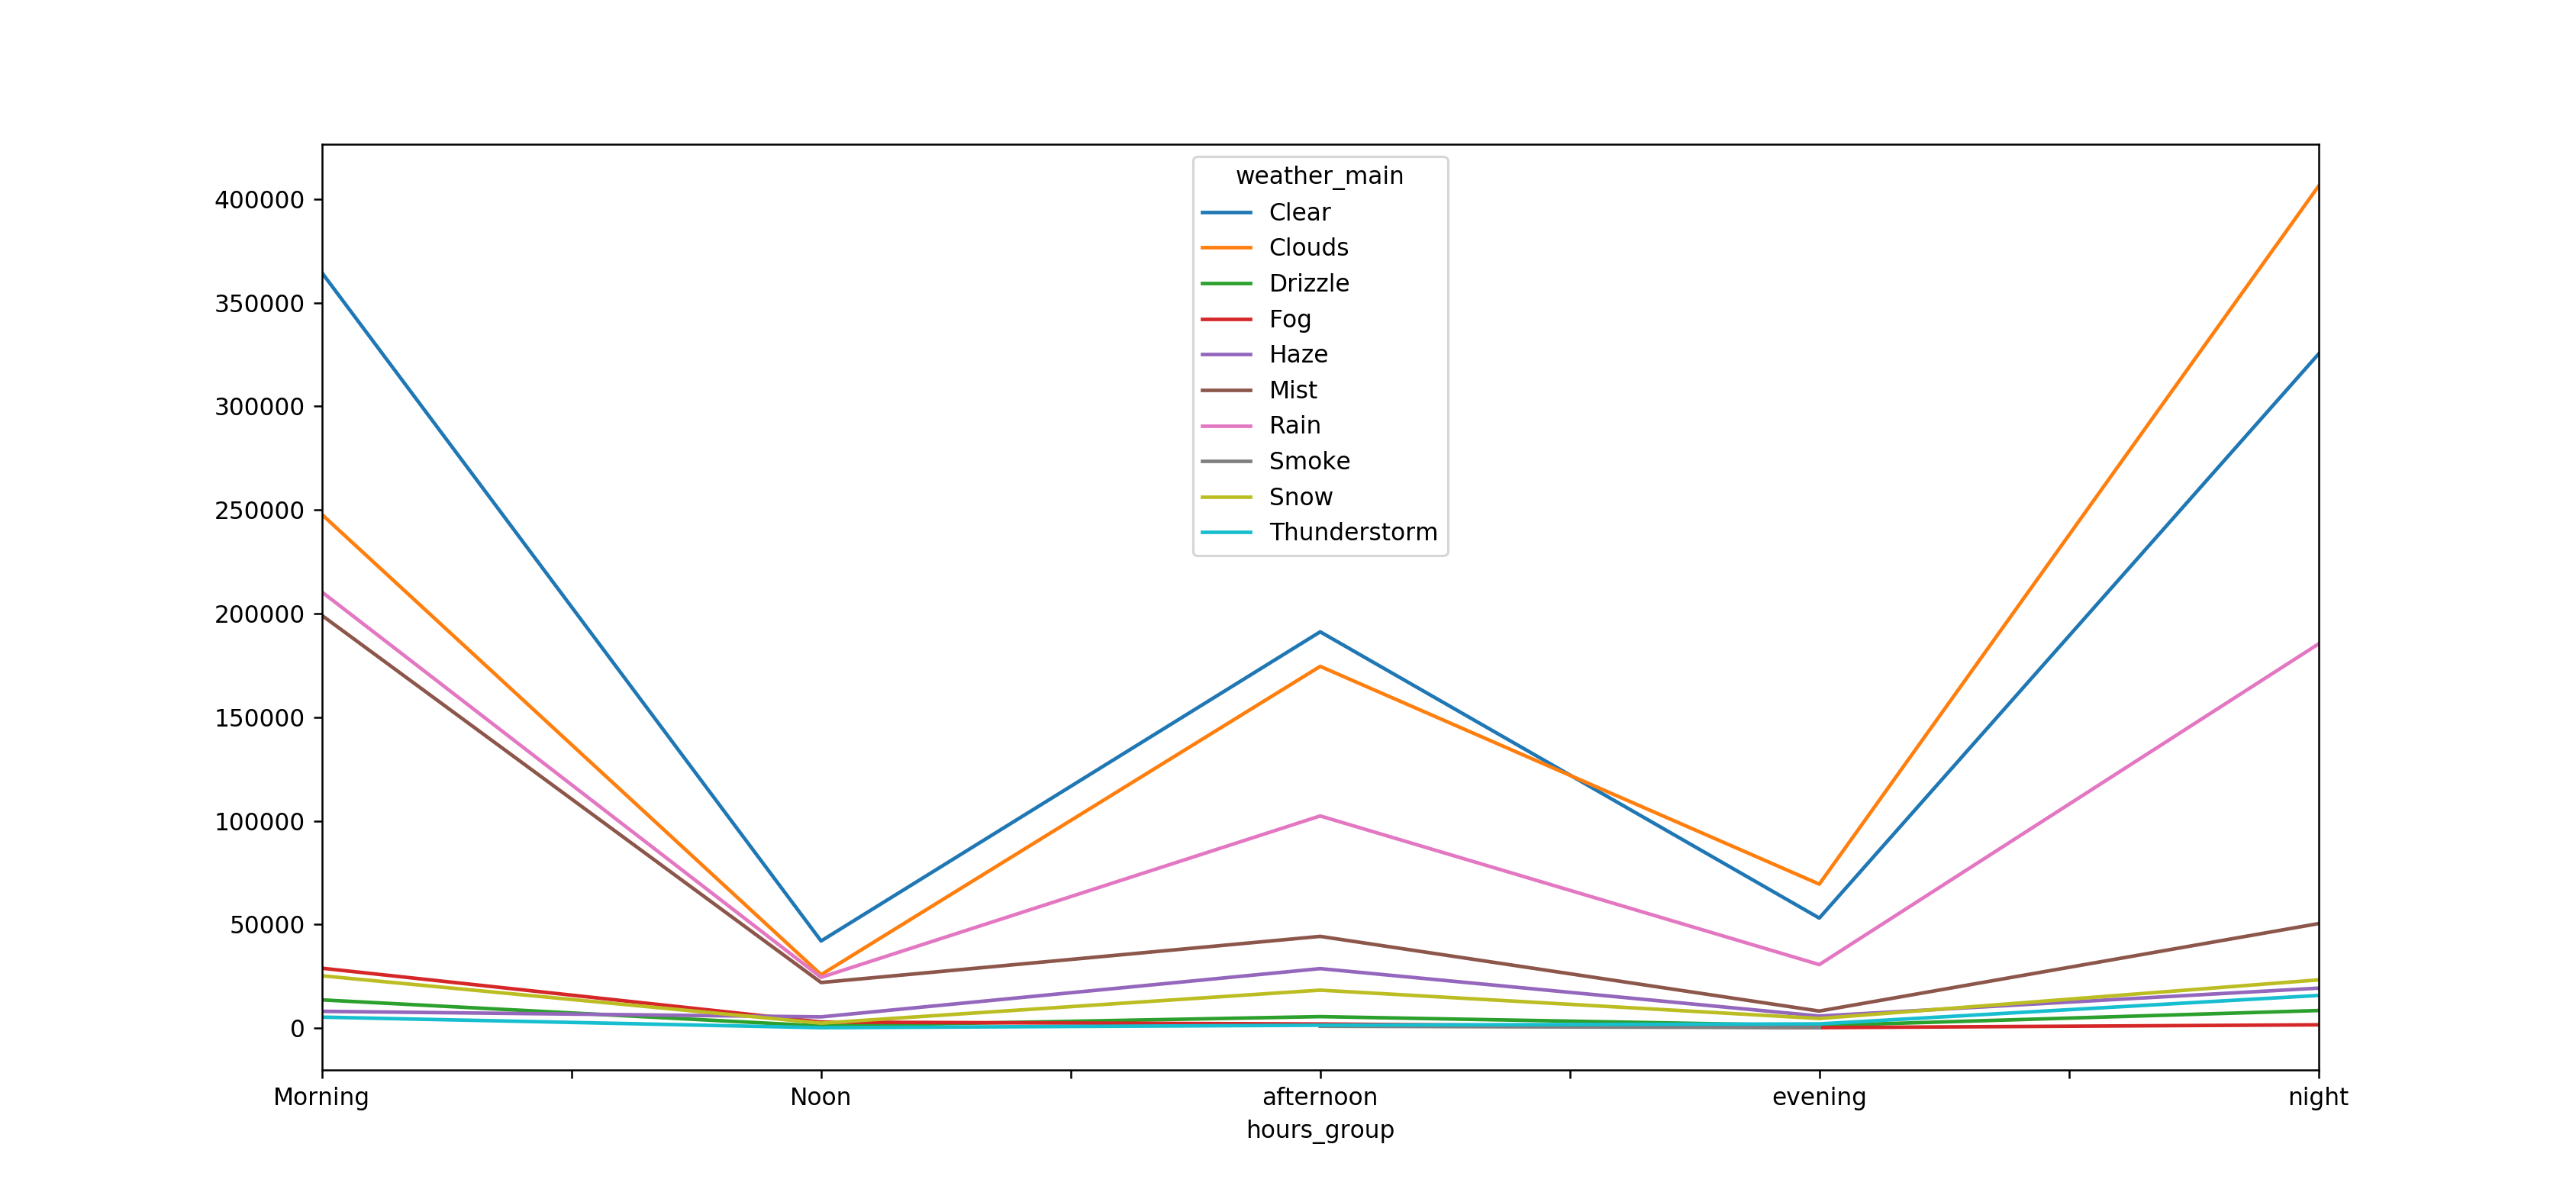

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
src_df.groupby(['hours_group','weather_main']).count()['Trip_Duration'].unstack().plot(ax=ax)

In [13]:
# Save an image of the chart and print it to the screen
plt.savefig("Stackedline_201801_weather_timeduration_hourgroups.png")
plt.show()

<IPython.core.display.Javascript object>


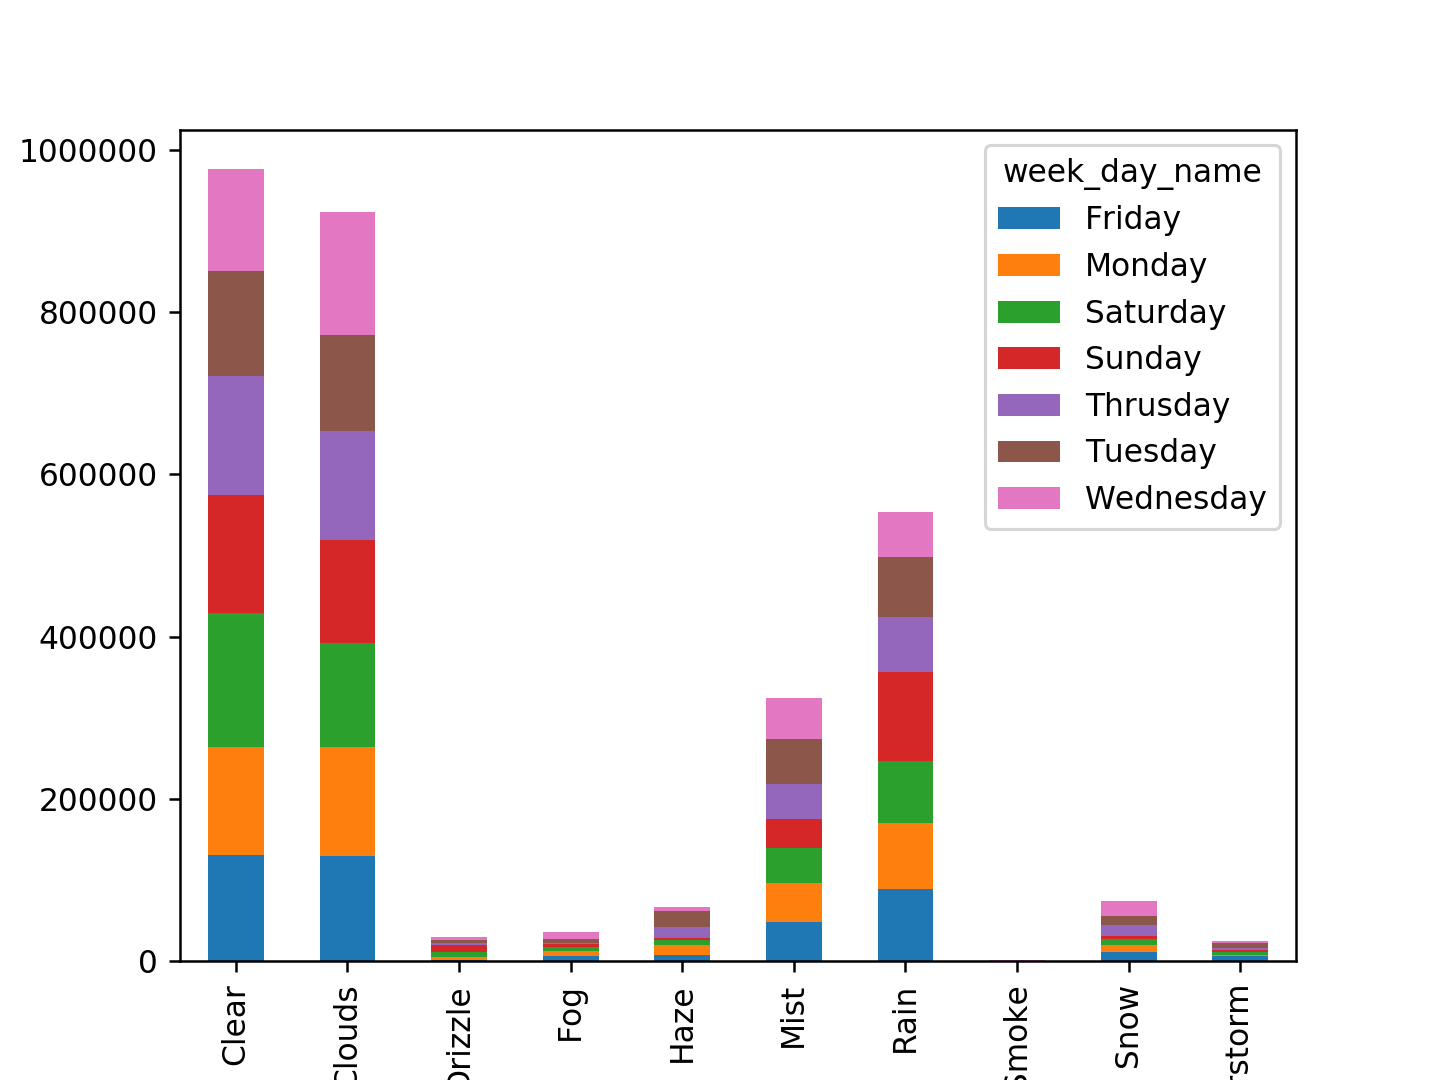

In [16]:
src_df.groupby(['weather_main','week_day_name']).size().unstack().plot(kind='bar',stacked=True)


In [152]:
# Save an image of the chart and print it to the screen
plt.savefig("StackedBar_201801_weather_hourly.png")
plt.show()